## 날씨 예측 모델

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
seoul_temperature = pd.read_csv("../CSV/서울 기상 데이터/2013_2018_seoul_temperature.csv", parse_dates = ["일시"])

In [3]:
seoul_temperature.head(3)

,일시,기온(°C),year,month,day,hour,weekday
0,2013-01-01 00:00:00,-8.3,2013,1,1,0,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,1,1
2,2013-01-01 02:00:00,-8.4,2013,1,1,2,1


In [4]:
seoul_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       52584 non-null  datetime64[ns]
 1   기온(°C)   52584 non-null  float64       
 2   year     52584 non-null  int64         
 3   month    52584 non-null  int64         
 4   day      52584 non-null  int64         
 5   hour     52584 non-null  int64         
 6   weekday  52584 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 2.8 MB


In [5]:
seoul_temperature.shape

(52584, 7)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [7]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour", "weekday"]]
y = seoul_temperature["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()

print("실행 시간 : {}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.994

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.993

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.991

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.989

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.986

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.982

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.996
테스트용 데이터 정확도 : 0.974

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.994
테스트용 데이터 정확도 : 0.962

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.992
테스트용 데이터 정확도 : 0.937

실행 시간 : 43.81558895111084


In [8]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour"]]
y = seoul_temperature["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()
    
print("실행 시간 : {}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.992

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.990

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.989

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.998
테스트용 데이터 정확도 : 0.986

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.983

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.997
테스트용 데이터 정확도 : 0.978

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.996
테스트용 데이터 정확도 : 0.970

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.994
테스트용 데이터 정확도 : 0.957

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.991
테스트용 데이터 정확도 : 0.936

실행 시간 : 37.11323380470276


In [9]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "hour"]]
y = seoul_temperature["기온(°C)"]

for i in range(1, 10, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = i / 10,
                                                       random_state = 42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    model.predict(X_test)
    print("학습용 : {}, 테스트용 : {}".format(10 - i, i))
    print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    print()
    
print("실행 시간 : {}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.886

학습용 : 8, 테스트용 : 2
학습용 데이터 정확도 : 0.892
테스트용 데이터 정확도 : 0.885

학습용 : 7, 테스트용 : 3
학습용 데이터 정확도 : 0.893
테스트용 데이터 정확도 : 0.883

학습용 : 6, 테스트용 : 4
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.882

학습용 : 5, 테스트용 : 5
학습용 데이터 정확도 : 0.894
테스트용 데이터 정확도 : 0.881

학습용 : 4, 테스트용 : 6
학습용 데이터 정확도 : 0.896
테스트용 데이터 정확도 : 0.880

학습용 : 3, 테스트용 : 7
학습용 데이터 정확도 : 0.899
테스트용 데이터 정확도 : 0.875

학습용 : 2, 테스트용 : 8
학습용 데이터 정확도 : 0.905
테스트용 데이터 정확도 : 0.867

학습용 : 1, 테스트용 : 9
학습용 데이터 정확도 : 0.923
테스트용 데이터 정확도 : 0.853

실행 시간 : 16.597831964492798


### 최종 모델 선택

In [10]:
start_time = time.time()

# 2013 ~ 2018
X = seoul_temperature[["year", "month", "day", "hour", "weekday"]]
y = seoul_temperature["기온(°C)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.1,
                                                   random_state = 42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.predict(X_test)

print("학습용 : {}, 테스트용 : {}".format(10 - 1, 1))
print("학습용 데이터 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 데이터 정확도 : {:.3f}".format(model.score(X_test, y_test)))
print("실행 시간 : {:.3f}".format(time.time() - start_time))

학습용 : 9, 테스트용 : 1
학습용 데이터 정확도 : 0.999
테스트용 데이터 정확도 : 0.994
실행 시간 : 7.313


In [11]:
test = pd.read_csv("../CSV/new_test.csv")

In [12]:
test.head(3)

,일자|시간|구분,일자,시간,구분,일시,year,month,day,hour,weekday
0,2019-01-01 01 A,2019-01-01,1,A,2019-01-01 00:00:00,2019,1,1,0,1
1,2019-01-01 02 A,2019-01-01,2,A,2019-01-01 01:00:00,2019,1,1,1,1
2,2019-01-01 03 A,2019-01-01,3,A,2019-01-01 02:00:00,2019,1,1,2,1


In [13]:
test.shape

(15120, 10)

In [14]:
test.tail(3)

,일자|시간|구분,일자,시간,구분,일시,year,month,day,hour,weekday
15117,2019-03-31 22 H,2019-03-31,22,H,2019-03-31 21:00:00,2019,3,31,21,6
15118,2019-03-31 23 H,2019-03-31,23,H,2019-03-31 22:00:00,2019,3,31,22,6
15119,2019-03-31 24 H,2019-03-31,24,H,2019-03-31 23:00:00,2019,3,31,23,6


In [15]:
test_x = test[["year", "month", "day", "hour", "weekday"]]

### 19년도 기온 예측

In [16]:
pred = model.predict(test_x)
test["기온"] = np.round(pred, 1) # 예측한 기온을 소수 첫째자리까지 표시

In [17]:
test.head(50)

,일자|시간|구분,일자,시간,구분,일시,year,month,day,hour,weekday,기온
0,2019-01-01 01 A,2019-01-01,1,A,2019-01-01 00:00:00,2019,1,1,0,1,-2.4
1,2019-01-01 02 A,2019-01-01,2,A,2019-01-01 01:00:00,2019,1,1,1,1,-2.5
2,2019-01-01 03 A,2019-01-01,3,A,2019-01-01 02:00:00,2019,1,1,2,1,-2.7
3,2019-01-01 04 A,2019-01-01,4,A,2019-01-01 03:00:00,2019,1,1,3,1,-2.9
4,2019-01-01 05 A,2019-01-01,5,A,2019-01-01 04:00:00,2019,1,1,4,1,-3.1
5,2019-01-01 06 A,2019-01-01,6,A,2019-01-01 05:00:00,2019,1,1,5,1,-3.3
6,2019-01-01 07 A,2019-01-01,7,A,2019-01-01 06:00:00,2019,1,1,6,1,-3.5
7,2019-01-01 08 A,2019-01-01,8,A,2019-01-01 07:00:00,2019,1,1,7,1,-3.6
8,2019-01-01 09 A,2019-01-01,9,A,2019-01-01 08:00:00,2019,1,1,8,1,-3.6
9,2019-01-01 10 A,2019-01-01,10,A,2019-01-01 09:00:00,2019,1,1,9,1,-3.3


In [18]:
seoul_temperature.head(50)

,일시,기온(°C),year,month,day,hour,weekday
0,2013-01-01 00:00:00,-8.3,2013,1,1,0,1
1,2013-01-01 01:00:00,-8.5,2013,1,1,1,1
2,2013-01-01 02:00:00,-8.4,2013,1,1,2,1
3,2013-01-01 03:00:00,-8.1,2013,1,1,3,1
4,2013-01-01 04:00:00,-8.2,2013,1,1,4,1
5,2013-01-01 05:00:00,-8.2,2013,1,1,5,1
6,2013-01-01 06:00:00,-8.6,2013,1,1,6,1
7,2013-01-01 07:00:00,-8.3,2013,1,1,7,1
8,2013-01-01 08:00:00,-7.9,2013,1,1,8,1
9,2013-01-01 09:00:00,-7.0,2013,1,1,9,1


### 예측한 데이터 저장
* test 데이터 프레임 저장

In [19]:
test.to_csv("../CSV/pred_test.csv", index = False)

### 시각화

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='일자', ylabel='기온'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

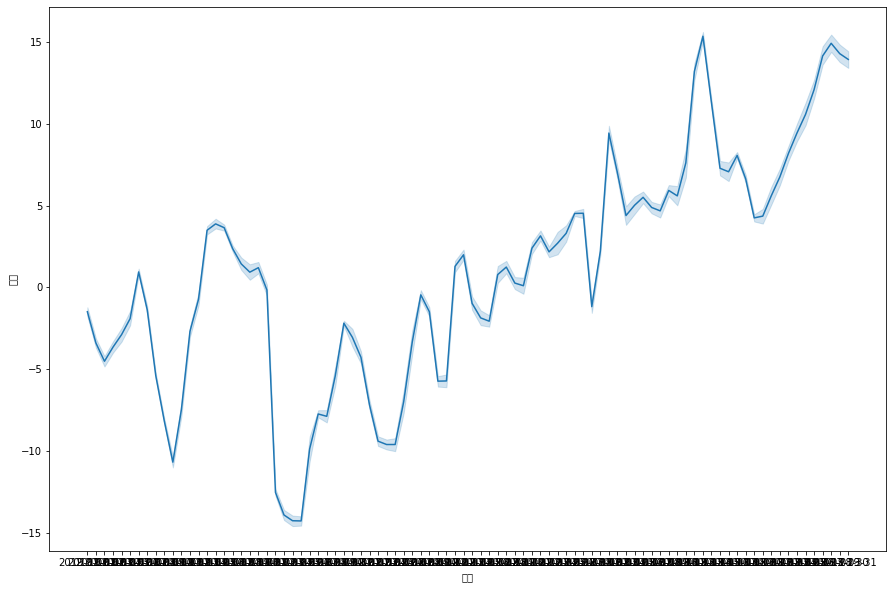

In [21]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일자", y = "기온", data = test)

In [22]:
a = seoul_temperature[(seoul_temperature["year"] == 2013) & 
             ((seoul_temperature["month"] == 1) | (seoul_temperature["month"] == 2) | (seoul_temperature["month"] == 3))]

<AxesSubplot:xlabel='일시', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  

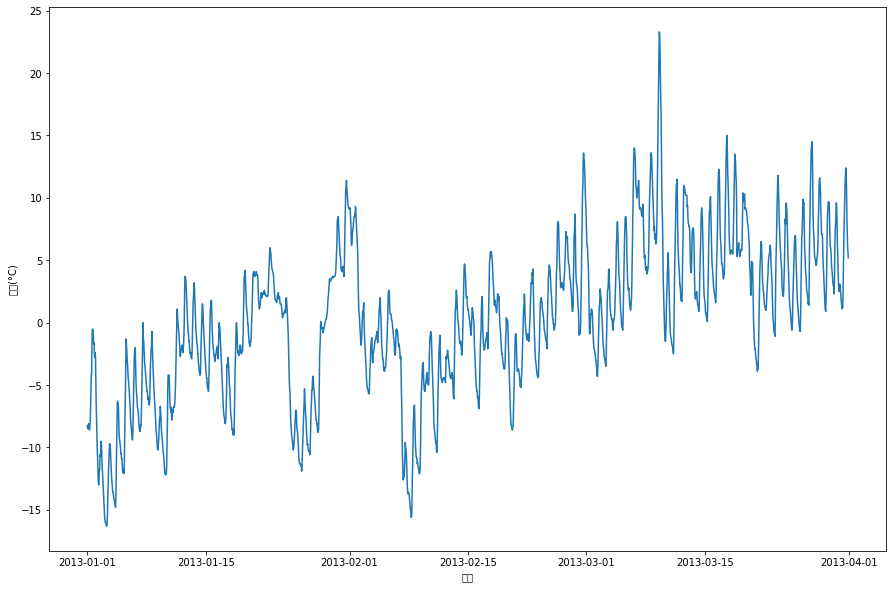

In [23]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = "일시", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


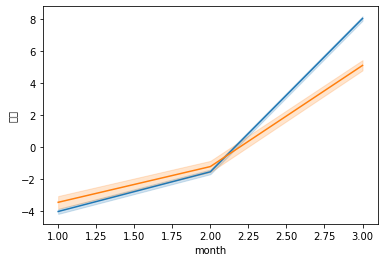

In [24]:
sns.lineplot(x = "month", y = "기온", data = test)
sns.lineplot(x = "month", y = "기온(°C)", data = a)

<AxesSubplot:xlabel='month', ylabel='기온(°C)'>

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


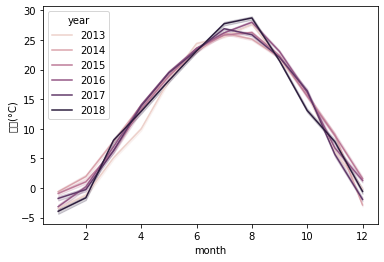

In [25]:
sns.lineplot(x = "month", y = "기온(°C)", hue = "year", data = seoul_temperature)